# Plot recovered versus un-recovered equivalent pathway mappings from ORA results

In [1]:
import json
import os
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools as itt

from bio2bel_kegg import Manager as KeggManager
from bio2bel_reactome import Manager as ReactomeManager
from bio2bel_wikipathways import Manager as WikipathwaysManager

from pathway_forte.constants import *
from pathway_forte.pathway_enrichment.functional_class import *

In [2]:
print(time.asctime())

Wed May 22 21:45:34 2019


In [3]:
# Initiate Bio2BEL manager to map pathway identifiers to names
kegg_manager = KeggManager()
reactome_manager = ReactomeManager()
wikipathways_manager = WikipathwaysManager()

In [5]:
brca_dataset = 'brca'
kirc_dataset = 'kirc'
lihc_dataset = 'lihc'
prad_dataset = 'prad'

In [6]:
def get_ora_results(dataset, threshold=False):
    """Get ORA results for KEGG, Reactome and WikiPathways for a dataset from JSON file. 
    """
    ORA = os.path.join(DATA, 'results', 'ora')
    
    if threshold == True:
        
        threshold_path = 'with_threshold'
        kegg_path = os.path.join(ORA, threshold_path, f'{dataset}_kegg_ora_threshold.json')
        reactome_path = os.path.join(ORA, threshold_path, f'{dataset}_reactome_ora_threshold.json')
        wikipathways_path = os.path.join(ORA, threshold_path, f'{dataset}_wikipathways_ora_threshold.json')
        merged_path = os.path.join(ORA, threshold_path, f'{dataset}_merged_ora_threshold.json')
    
    else:
        
        no_threshold_path = 'without_threshold'
        kegg_path = os.path.join(ORA, no_threshold_path, f'{dataset}_kegg_ora.json')
        reactome_path = os.path.join(ORA, no_threshold_path, f'{dataset}_reactome_ora.json')
        wikipathways_path = os.path.join(ORA, no_threshold_path, f'{dataset}_wikipathways_ora.json')
        merged_path = os.path.join(ORA, no_threshold_path, f'{dataset}_merged_ora.json')
       
    kegg_df = pd.DataFrame()
    reactome_df = pd.DataFrame()
    wp_df = pd.DataFrame()
    merged_df = pd.DataFrame()

    with open(kegg_path) as f:
        kegg_data = json.load(f)        
        kegg_df['pathway_id'] = [
            pathway_id for pathway_id in list(kegg_data.keys())]
       
    with open(reactome_path) as f:
        reactome_data = json.load(f)        
        reactome_df['pathway_id'] = [
            pathway_id for pathway_id in list(reactome_data.keys())]

    with open(wikipathways_path) as f:
        wp_data = json.load(f)        
        wp_df['pathway_id'] = [
            pathway_id for pathway_id in list(wp_data.keys())]
        
    with open(merged_path) as f:
        merged_data = json.load(f)        
        merged_df['pathway_id'] = [
            pathway_id for pathway_id in list(merged_data.keys())]
        
    return kegg_df, reactome_df, wp_df, merged_df

In [7]:
# with threshold
brca_kegg_df_threshold, brca_reactome_df_threshold, brca_wp_df_threshold, brca_merged_df_threshold = get_ora_results('brca',threshold=True)
kirc_kegg_df_threshold, kirc_reactome_df_threshold, kirc_wp_df_threshold, kirc_merged_df_threshold = get_ora_results('kirc',threshold=True)
lihc_kegg_df_threshold, lihc_reactome_df_threshold, lihc_wp_df_threshold, lihc_merged_df_threshold = get_ora_results('lihc',threshold=True)
prad_kegg_df_threshold, prad_reactome_df_threshold, prad_wp_df_threshold, prad_merged_df_threshold = get_ora_results('prad',threshold=True)

In [9]:
# without threshold
brca_kegg_df, brca_reactome_df, brca_wp_df, brca_merged_df = get_ora_results('brca')
kirc_kegg_df, kirc_reactome_df, kirc_wp_df, kirc_merged_df = get_ora_results('kirc')
lihc_kegg_df, lihc_reactome_df, lihc_wp_df, lihc_merged_df = get_ora_results('lihc')
prad_kegg_df, prad_reactome_df, prad_wp_df, prad_merged_df = get_ora_results('prad')

In [10]:
# with threshold
brca_actual_dict_threshold, brca_expected_dict_threshold = get_pairwise_mapping_numbers(
    brca_kegg_df_threshold, 
    brca_reactome_df_threshold, 
    brca_wp_df_threshold, 
)
kirc_actual_dict_threshold, kirc_expected_dict_threshold = get_pairwise_mapping_numbers(
    kirc_kegg_df_threshold, 
    kirc_reactome_df_threshold, 
    kirc_wp_df_threshold, 
)
lihc_actual_dict_threshold, lihc_expected_dict_threshold = get_pairwise_mapping_numbers(
    lihc_kegg_df_threshold, 
    lihc_reactome_df_threshold, 
    lihc_wp_df_threshold, 
)
prad_actual_dict_threshold, prad_expected_dict_threshold = get_pairwise_mapping_numbers(
    prad_kegg_df_threshold, 
    prad_reactome_df_threshold, 
    prad_wp_df_threshold, 
)

# without threshold
brca_actual_dict, brca_expected_dict = get_pairwise_mapping_numbers(
    brca_kegg_df, 
    brca_reactome_df, 
    brca_wp_df, 
)
kirc_actual_dict, kirc_expected_dict = get_pairwise_mapping_numbers(
    kirc_kegg_df, 
    kirc_reactome_df, 
    kirc_wp_df, 
)
lihc_actual_dict, lihc_expected_dict = get_pairwise_mapping_numbers(
    lihc_kegg_df, 
    lihc_reactome_df, 
    lihc_wp_df, 
)
prad_actual_dict, prad_expected_dict = get_pairwise_mapping_numbers(
    prad_kegg_df, 
    prad_reactome_df, 
    prad_wp_df, 
)

In [11]:
def get_pairwise_mappings(
        kegg_pathway_df,
        reactome_pathway_df,
        wikipathways_pathway_df,
):
    """Get pairwise mappings"""
    pairwise_comparison = [
        (kegg_pathway_df, KEGG),
        (reactome_pathway_df, REACTOME),
        (wikipathways_pathway_df, WIKIPATHWAYS),
    ]
    # Load mappings
    dfs = load_compath_mapping_dfs()
    # Get KEGG-Reactome, KEGG-WikiPathways and WikiPathways-Reactome mappings
    final_df = pd.concat([dfs[0], dfs[1], dfs[2]])

    equivalent_mappings_dict = get_mapping_dict(final_df, 'equivalentTo')

    actual_mappings = {}

    for (df1, resource1), (df2, resource2) in itt.permutations(pairwise_comparison, 2):
        matching_mappings = get_matching_pairs(
            df1, resource1, df2, resource2, equivalent_mappings_dict
        )

    actual_mappings[(resource1, resource2)] = matching_mappings
    

In [16]:
merge_statistics(brca_merged_df_threshold, 'BRCA')
merge_statistics(kirc_merged_df_threshold, 'KIRC')
merge_statistics(lihc_merged_df_threshold, 'LIHC')
merge_statistics(prad_merged_df_threshold, 'PRAD')

For the 245 pathways in the merged dataset results for BRCA:
12.65% are from KEGG
73.06% are from Reactome
14.29% are from WikiPathways
4.49% are a combination of 2 or more databases
For the 31 pathways in the merged dataset results for KIRC:
19.35% are from KEGG
70.97% are from Reactome
9.68% are from WikiPathways
6.45% are a combination of 2 or more databases
For the 102 pathways in the merged dataset results for LIHC:
10.78% are from KEGG
75.49% are from Reactome
13.73% are from WikiPathways
3.92% are a combination of 2 or more databases
For the 39 pathways in the merged dataset results for PRAD:
35.90% are from KEGG
43.59% are from Reactome
20.51% are from WikiPathways
10.26% are a combination of 2 or more databases


In [12]:
merge_statistics(brca_merged_df, 'BRCA')
merge_statistics(kirc_merged_df, 'KIRC')
merge_statistics(lihc_merged_df, 'LIHC')
merge_statistics(prad_merged_df, 'PRAD')

For the 972 pathways in the merged dataset results for BRCA:
21.19% are from KEGG
67.39% are from Reactome
11.42% are from WikiPathways
9.05% are a combination of 2 or more databases
For the 57 pathways in the merged dataset results for KIRC:
19.30% are from KEGG
78.95% are from Reactome
1.75% are from WikiPathways
17.54% are a combination of 2 or more databases
For the 1430 pathways in the merged dataset results for LIHC:
18.25% are from KEGG
66.57% are from Reactome
15.17% are from WikiPathways
7.06% are a combination of 2 or more databases
For the 913 pathways in the merged dataset results for PRAD:
21.91% are from KEGG
63.20% are from Reactome
14.90% are from WikiPathways
9.20% are a combination of 2 or more databases


Plot how many pairwise pathways with mappings exist versus how many are expected

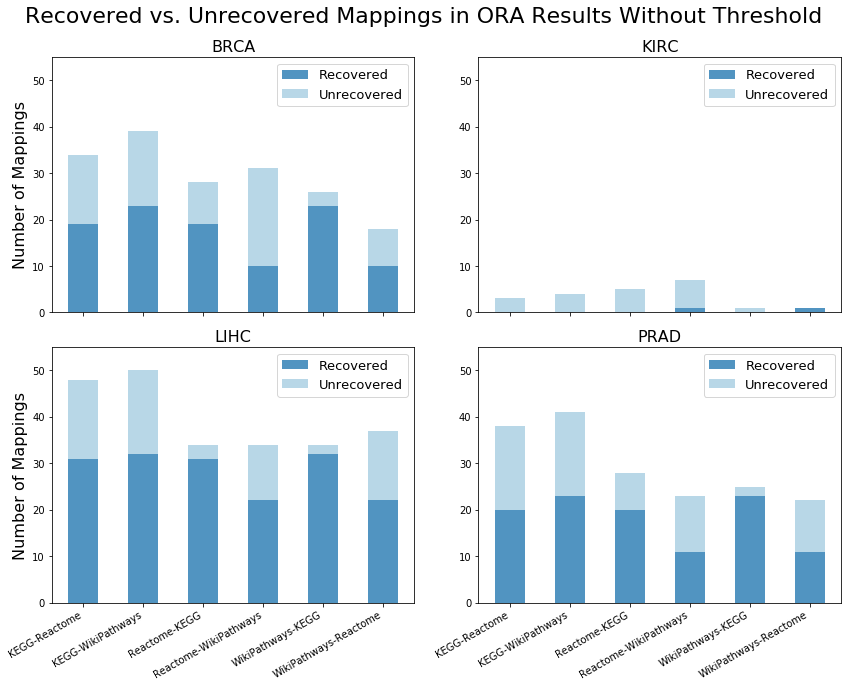

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle('Recovered vs. Unrecovered Mappings in ORA Results Without Threshold', fontsize=22)

N = 6
index = np.arange(N)
bar_width = 0.5
opacity = 0.8

pairings = ('KEGG-Reactome', 
 'KEGG-WikiPathways', 
 'Reactome-KEGG', 
 'Reactome-WikiPathways',
 'WikiPathways-KEGG', 
 'WikiPathways-Reactome',
)
label_font = {'size': 16}


plt.subplot(2, 2, 1)
actual_vals = list(brca_actual_dict.values())
expected_vals = list(brca_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('BRCA', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.ylim(0,55)
plt.legend(prop={'size':13},loc=1)


plt.subplot(2, 2, 2)
actual_vals = list(kirc_actual_dict.values())
expected_vals = list(kirc_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('KIRC', fontsize=16)
plt.xticks(index, pairings)
plt.ylim(0,55)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 3)
actual_vals = list(lihc_actual_dict.values())
expected_vals = list(lihc_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('LIHC', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.ylim(0,55)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 4)
actual_vals = list(prad_actual_dict.values())
expected_vals = list(prad_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('PRAD', fontsize=16)
plt.ylim(0,55)
plt.xticks(index, pairings)
plt.legend(prop={'size':13},loc=1)

fig.autofmt_xdate()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('pairwise_mappings_ora_without_threshold.png',dpi=250)
plt.show()

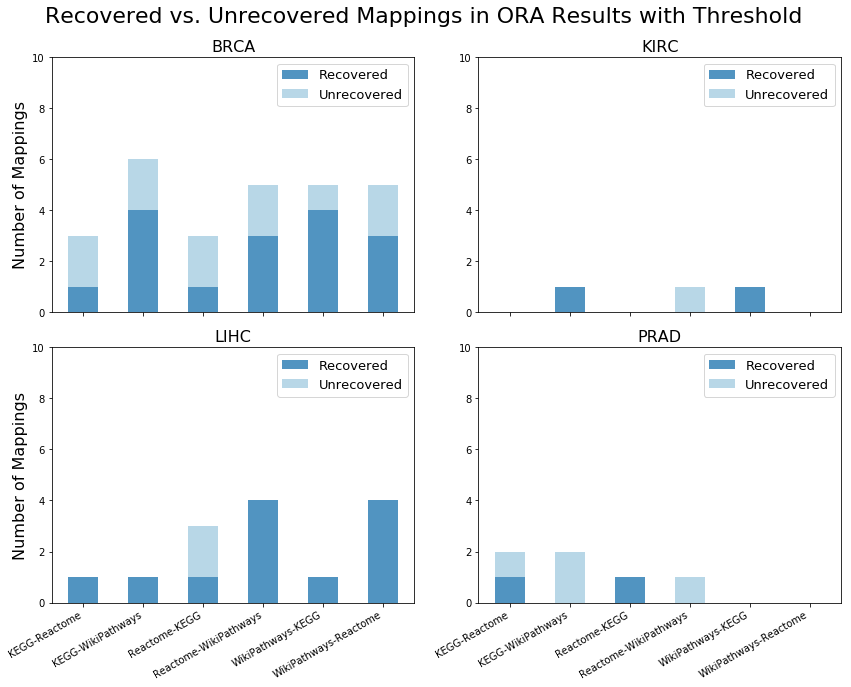

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle('Recovered vs. Unrecovered Mappings in ORA Results with Threshold', fontsize=22)

N = 6
index = np.arange(N)
bar_width = 0.5
opacity = 0.8

pairings = ('KEGG-Reactome', 
 'KEGG-WikiPathways', 
 'Reactome-KEGG', 
 'Reactome-WikiPathways',
 'WikiPathways-KEGG', 
 'WikiPathways-Reactome',
)
label_font = {'size': 16}


plt.subplot(2, 2, 1)
actual_vals = list(brca_actual_dict_threshold.values())
expected_vals = list(brca_expected_dict_threshold.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('BRCA', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.ylim(0,10)
plt.legend(prop={'size':13},loc=1)


plt.subplot(2, 2, 2)
actual_vals = list(kirc_actual_dict_threshold.values())
expected_vals = list(kirc_expected_dict_threshold.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('KIRC', fontsize=16)
plt.xticks(index, pairings)
plt.ylim(0,10)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 3)
actual_vals = list(lihc_actual_dict_threshold.values())
expected_vals = list(lihc_expected_dict_threshold.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('LIHC', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.ylim(0,10)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 4)
actual_vals = list(prad_actual_dict_threshold.values())
expected_vals = list(prad_expected_dict_threshold.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('PRAD', fontsize=16)
plt.ylim(0,10)
plt.xticks(index, pairings)
plt.legend(prop={'size':13},loc=1)

fig.autofmt_xdate()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('pairwise_mappings_ora_with_threshold.png',dpi=250)
plt.show()